In [90]:
import pandas as pd
import numpy as np

## load dataset 


In [91]:
df = pd.read_csv('Stroke Dataset.csv')
df.sample()

Unnamed: 0    id  gender   age  hypertension  heart_disease  \
2266        2266  2778       0  56.0             0              0   

      ever_married  work_type  Residence_type  avg_glucose_level   bmi  \
2266             1          3               0             110.92  25.9   

      smoking_status  stroke  
2266               0       0

In [92]:
df = df.drop(['id','gender'], axis=1)

In [93]:
df.sample()

Unnamed: 0   age  hypertension  heart_disease  ever_married  work_type  \
1374        1374  58.0             0              0             1          0   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
1374               1             101.05  31.4               0       0

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [95]:
numrical = []
catgcols = []

for col in df.columns:
    if df [col].dtype=="float64":
        numrical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numrical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)            

In [96]:
numrical

['age', 'avg_glucose_level', 'bmi']

In [97]:
catgcols

['Unnamed: 0',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke']

In [98]:
df['smoking_status'].value_counts()

smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64

In [99]:
ind_col =[col for col in df.columns if col !='smoking_status']
dep_col = 'smoking_status'

In [100]:
df[dep_col].value_counts()

smoking_status
2    1892
0    1544
1     885
3     789
Name: count, dtype: int64

## transpormasi dataset

In [101]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in catgcols:
    df[col] = le.fit_transform(df[col])

In [102]:
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [103]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [104]:
df.head()

Unnamed: 0   age  hypertension  heart_disease  ever_married  work_type  \
0           0  67.0             0              1             1          2   
1           1  61.0             0              0             1          3   
2           2  80.0             0              1             1          2   
3           3  49.0             0              0             1          2   
4           4  79.0             1              0             1          3   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             202.21  28.1               2       1  
2               0             105.92  32.5               2       1  
3               1             171.23  34.4               3       1  
4               0             174.12  24.0               2       1

In [105]:
df.to_csv('Stroke-Dataset.csv')

## Step EDA

In [106]:
#cek data kosong
df.isnull().values.any()

False

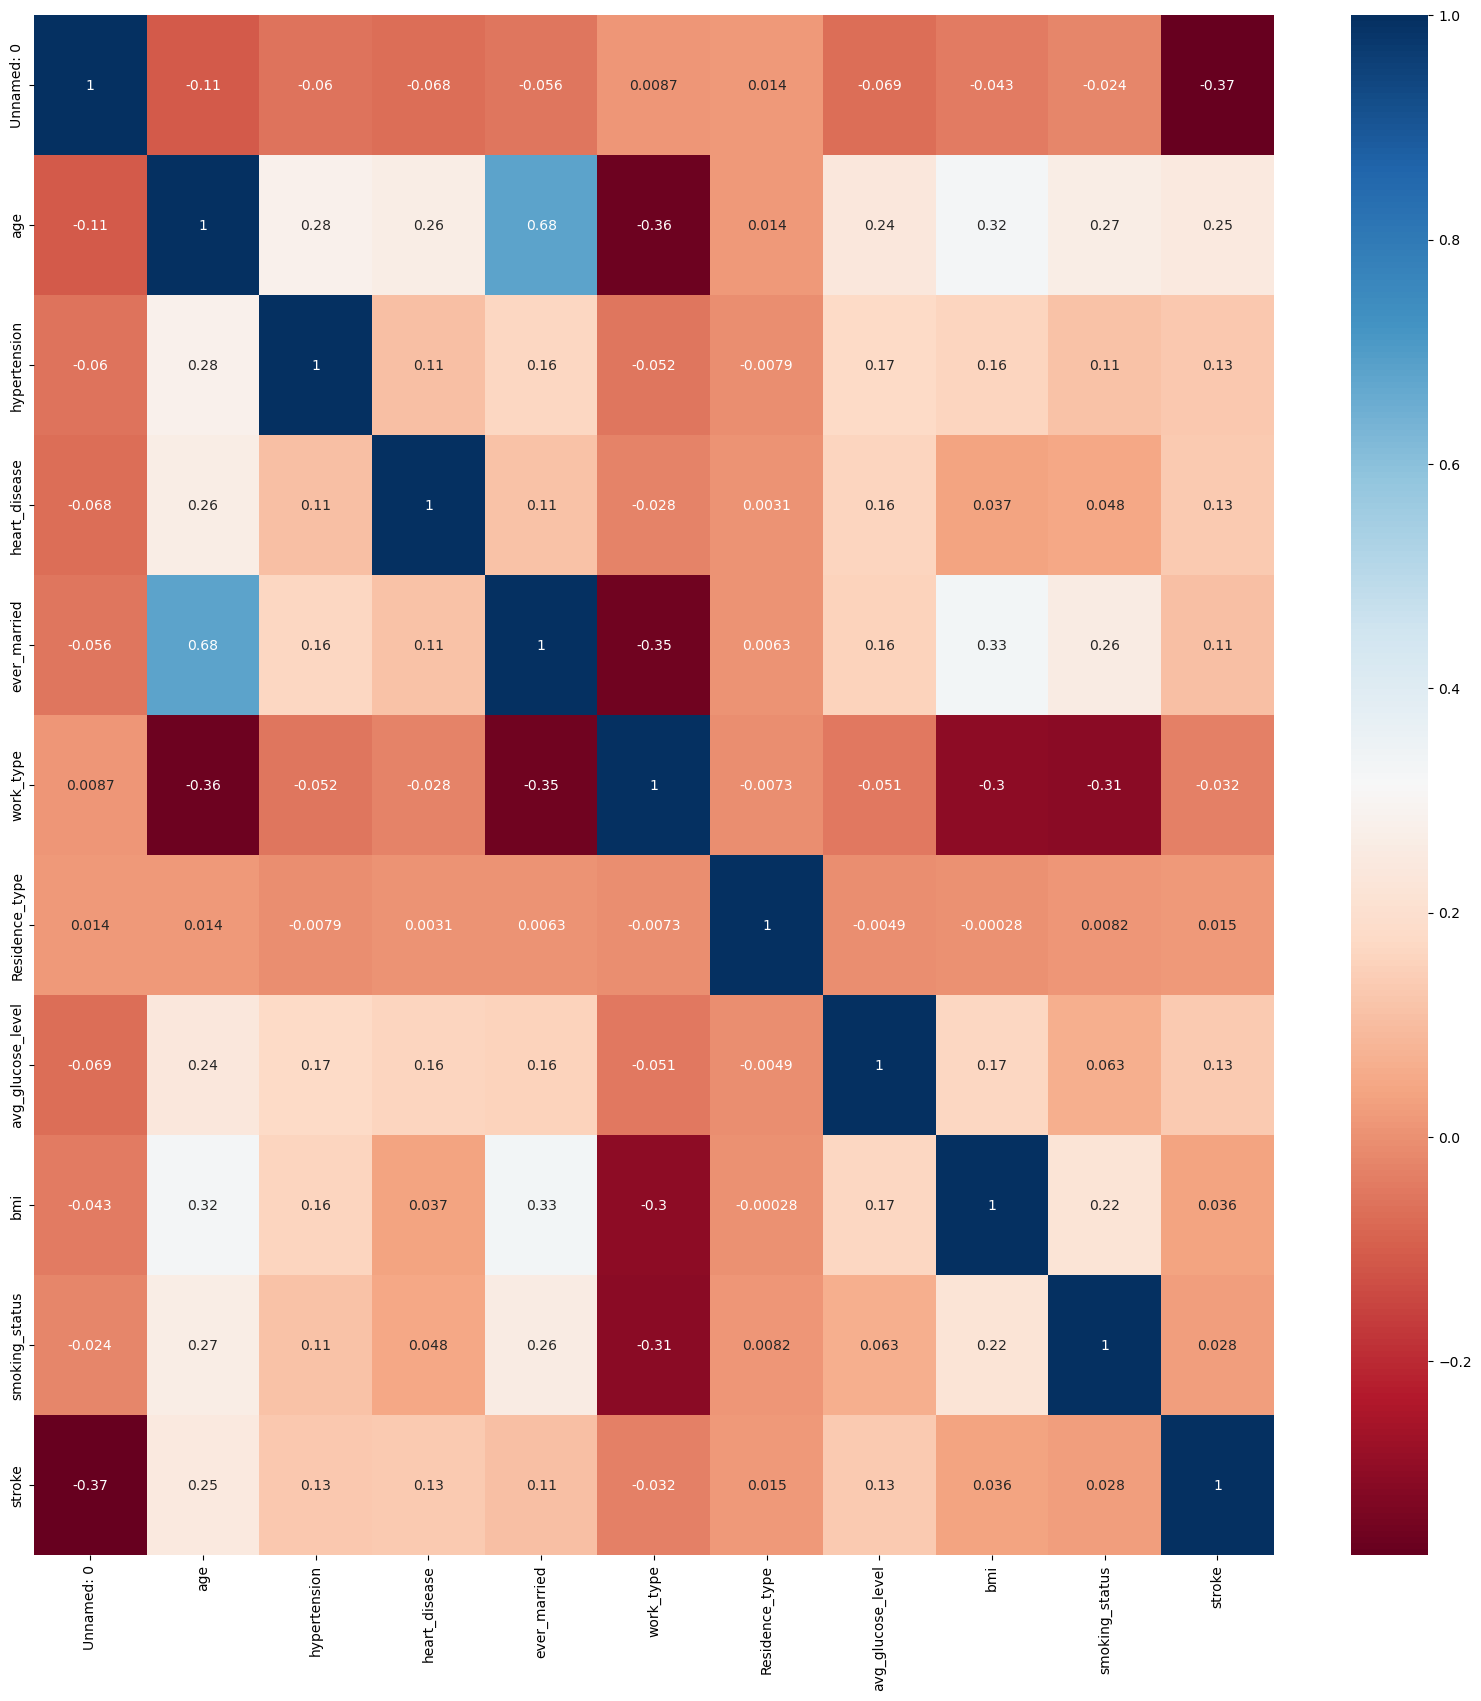

In [107]:
#Korelasi menggunakan heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your other code here...

korelasi = df.corr()
features = korelasi.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(df[features].corr(), annot=True, cmap="RdBu")

In [108]:
#Show corellation in tables
df.corr()

Unnamed: 0       age  hypertension  heart_disease  \
Unnamed: 0           1.000000 -0.107892     -0.060343      -0.067657   
age                 -0.107892  1.000000      0.276398       0.263796   
hypertension        -0.060343  0.276398      1.000000       0.108306   
heart_disease       -0.067657  0.263796      0.108306       1.000000   
ever_married        -0.055987  0.679125      0.164243       0.114644   
work_type            0.008702 -0.361642     -0.051761      -0.028023   
Residence_type       0.014220  0.014180     -0.007913       0.003092   
avg_glucose_level   -0.068993  0.238171      0.174474       0.161857   
bmi                 -0.042838  0.324296      0.158293       0.036916   
smoking_status      -0.023846  0.265199      0.111038       0.048460   
stroke              -0.372908  0.245257      0.127904       0.134914   

                   ever_married  work_type  Residence_type  avg_glucose_level  \
Unnamed: 0            -0.055987   0.008702        0.014220          -0.068993   
age                    0.679125  -0.361642        0.014180           0.238171   
hypertension           0.164243  -0.051761       -0.007913           0.174474   
heart_disease          0.114644  -0.028023        0.003092           0.161857   
ever_married           1.000000  -0.352722        0.006261           0.155068   
work_type             -0.352722   1.000000       -0.007316          -0.050513   
Residence_type         0.006261  -0.007316        1.000000          -0.004946   
avg_glucose_level      0.155068  -0.050513       -0.004946           1.000000   
bmi                    0.334911  -0.299172       -0.000277           0.166876   
smoking_status         0.259647  -0.305927        0.008237           0.063437   
stroke                 0.108340  -0.032316        0.015458           0.131945   

                        bmi  smoking_status    stroke  
Unnamed: 0        -0.042838       -0.023846 -0.372908  
age                0.324296        0.265199  0.245257  
hypertension       0.158293        0.111038  0.127904  
heart_disease      0.036916        0.048460  0.134914  
ever_married       0.334911        0.259647  0.108340  
work_type         -0.299172       -0.305927 -0.032316  
Residence_type    -0.000277        0.008237  0.015458  
avg_glucose_level  0.166876        0.063437  0.131945  
bmi                1.000000        0.218968  0.036110  
smoking_status     0.218968        1.000000  0.028123  
stroke             0.036110        0.028123  1.000000

In [109]:
#statistika dasar
df.describe()

Unnamed: 0          age  hypertension  heart_disease  ever_married  \
count  5110.000000  5110.000000   5110.000000    5110.000000   5110.000000   
mean   2554.500000    43.226614      0.097456       0.054012      0.656164   
std    1475.274268    22.612647      0.296607       0.226063      0.475034   
min       0.000000     0.080000      0.000000       0.000000      0.000000   
25%    1277.250000    25.000000      0.000000       0.000000      0.000000   
50%    2554.500000    45.000000      0.000000       0.000000      1.000000   
75%    3831.750000    61.000000      0.000000       0.000000      1.000000   
max    5109.000000    82.000000      1.000000       1.000000      1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  5110.000000     5110.000000        5110.000000  5110.000000   
mean      2.167710        0.508023         106.147677    28.862035   
std       1.090293        0.499985          45.283560     7.699562   
min       0.000000        0.000000          55.120000    10.300000   
25%       2.000000        0.000000          77.245000    23.800000   
50%       2.000000        1.000000          91.885000    28.100000   
75%       3.000000        1.000000         114.090000    32.800000   
max       4.000000        1.000000         271.740000    97.600000   

       smoking_status       stroke  
count     5110.000000  5110.000000  
mean         1.376908     0.048728  
std          1.071534     0.215320  
min          0.000000     0.000000  
25%          0.000000     0.000000  
50%          2.000000     0.000000  
75%          2.000000     0.000000  
max          3.000000     1.000000

In [110]:
#checking skewness dari data
Stroke_true_count =len(df.loc[df['stroke']==1])
Stroke_false_count = len(df.loc[df['stroke']==0])

In [111]:
#view
(Stroke_true_count,Stroke_false_count)

(249, 4861)

In [112]:
#Missing value
print('total number of rows : {0}'.format(df.shape[0]))
print('total number of columns : {0}'.format(df.shape[1]))

total number of rows : 5110
total number of columns : 11


In [113]:
df.columns

Index(['Unnamed: 0', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [114]:
print('Banyak baris nilai nol untuk hipertensi :{0}'.format(len(df.loc[df['hypertension']==0])))
print('Banyak baris nilai nol untuk penyakit jantung :{0}'.format(len(df.loc[df['heart_disease']==0])))
print('Banyak baris nilai nol untuk yang pernah menikah :{0}'.format(len(df.loc[df['ever_married']==0])))
print('Banyak baris nilai nol untuk tipe kerja :{0}'.format(len(df.loc[df['work_type']==0])))
print('Banyak baris nilai nol untuk tempat tinggal :{0}'.format(len(df.loc[df['Residence_type']==0])))
print('Banyak baris nilai nol untuk tingkat glukosa rata-rata :{0}'.format(len(df.loc[df['avg_glucose_level']==0])))
print('Banyak baris nilai nol untuk ketebalan bmi:{0}'.format(len(df.loc[df['bmi']==0])))
print('Banyak baris nilai nol untuk status merokok :{0}'.format(len(df.loc[df['smoking_status']==0])))
print('Banyak baris nilai nol untuk stroke:{0}'.format(len(df.loc[df['stroke']==0])))
print('Banyak baris nilai nol untuk ketebalan Usia :{0}'.format(len(df.loc[df['age']==0])))

Banyak baris nilai nol untuk hipertensi :4612
Banyak baris nilai nol untuk penyakit jantung :4834
Banyak baris nilai nol untuk yang pernah menikah :1757
Banyak baris nilai nol untuk tipe kerja :657
Banyak baris nilai nol untuk tempat tinggal :2514
Banyak baris nilai nol untuk tingkat glukosa rata-rata :0
Banyak baris nilai nol untuk ketebalan bmi:0
Banyak baris nilai nol untuk status merokok :1544
Banyak baris nilai nol untuk stroke:4861
Banyak baris nilai nol untuk ketebalan Usia :0


In [115]:
data2 = df.copy()

In [116]:
#rata-rata
avg_hipertensi= data2['hypertension'].mean()
avg_penyakitjantung= data2['heart_disease'].mean()
avg_pernahmenikah = data2['ever_married'].mean()
avg_tempattinggal  = data2['Residence_type'].mean()
avg_statusmerokok = data2['smoking_status'].mean()
avg_stroke = data2['stroke'].mean()

In [117]:
#now replace avg to columns 
data2['hypertension'].replace({0:avg_hipertensi},inplace=True)
data2['heart_disease'].replace({0:avg_penyakitjantung},inplace=True)
data2['ever_married'].replace({0:avg_pernahmenikah },inplace=True)
data2['Residence_type'].replace({0:avg_tempattinggal},inplace=True)
data2['smoking_status'].replace({0:avg_statusmerokok},inplace=True)
data2['stroke'].replace({0:avg_stroke},inplace=True)

In [118]:
#double check
print('Banyak baris nilai nol untuk hipertensi :{0}'.format(len(data2.loc[data2['hypertension']==0])))
print('Banyak baris nilai nol untuk penyakit jantung :{0}'.format(len(data2.loc[data2['heart_disease']==0])))
print('Banyak baris nilai nol untuk yang pernah menikah :{0}'.format(len(data2.loc[data2['ever_married']==0])))
print('Banyak baris nilai nol untuk tipe kerja :{0}'.format(len(data2.loc[data2['work_type']==0])))
print('Banyak baris nilai nol untuk tempat tinggal :{0}'.format(len(data2.loc[data2['Residence_type']==0])))
print('Banyak baris nilai nol untuk tingkat glukosa rata-rata :{0}'.format(len(data2.loc[data2['avg_glucose_level']==0])))
print('Banyak baris nilai nol untuk ketebalan bmi:{0}'.format(len(data2.loc[data2['bmi']==0])))
print('Banyak baris nilai nol untuk status merokok :{0}'.format(len(data2.loc[data2['smoking_status']==0])))
print('Banyak baris nilai nol untuk stroke:{0}'.format(len(data2.loc[data2['stroke']==0])))
print('Banyak baris nilai nol untuk ketebalan Usia :{0}'.format(len(data2.loc[data2['age']==0])))

Banyak baris nilai nol untuk hipertensi :0
Banyak baris nilai nol untuk penyakit jantung :0
Banyak baris nilai nol untuk yang pernah menikah :0
Banyak baris nilai nol untuk tipe kerja :657
Banyak baris nilai nol untuk tempat tinggal :0
Banyak baris nilai nol untuk tingkat glukosa rata-rata :0
Banyak baris nilai nol untuk ketebalan bmi:0
Banyak baris nilai nol untuk status merokok :0
Banyak baris nilai nol untuk stroke:0
Banyak baris nilai nol untuk ketebalan Usia :0


c:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Asus\AppData\Local\Temp\ipykernel_12156\3763724095.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


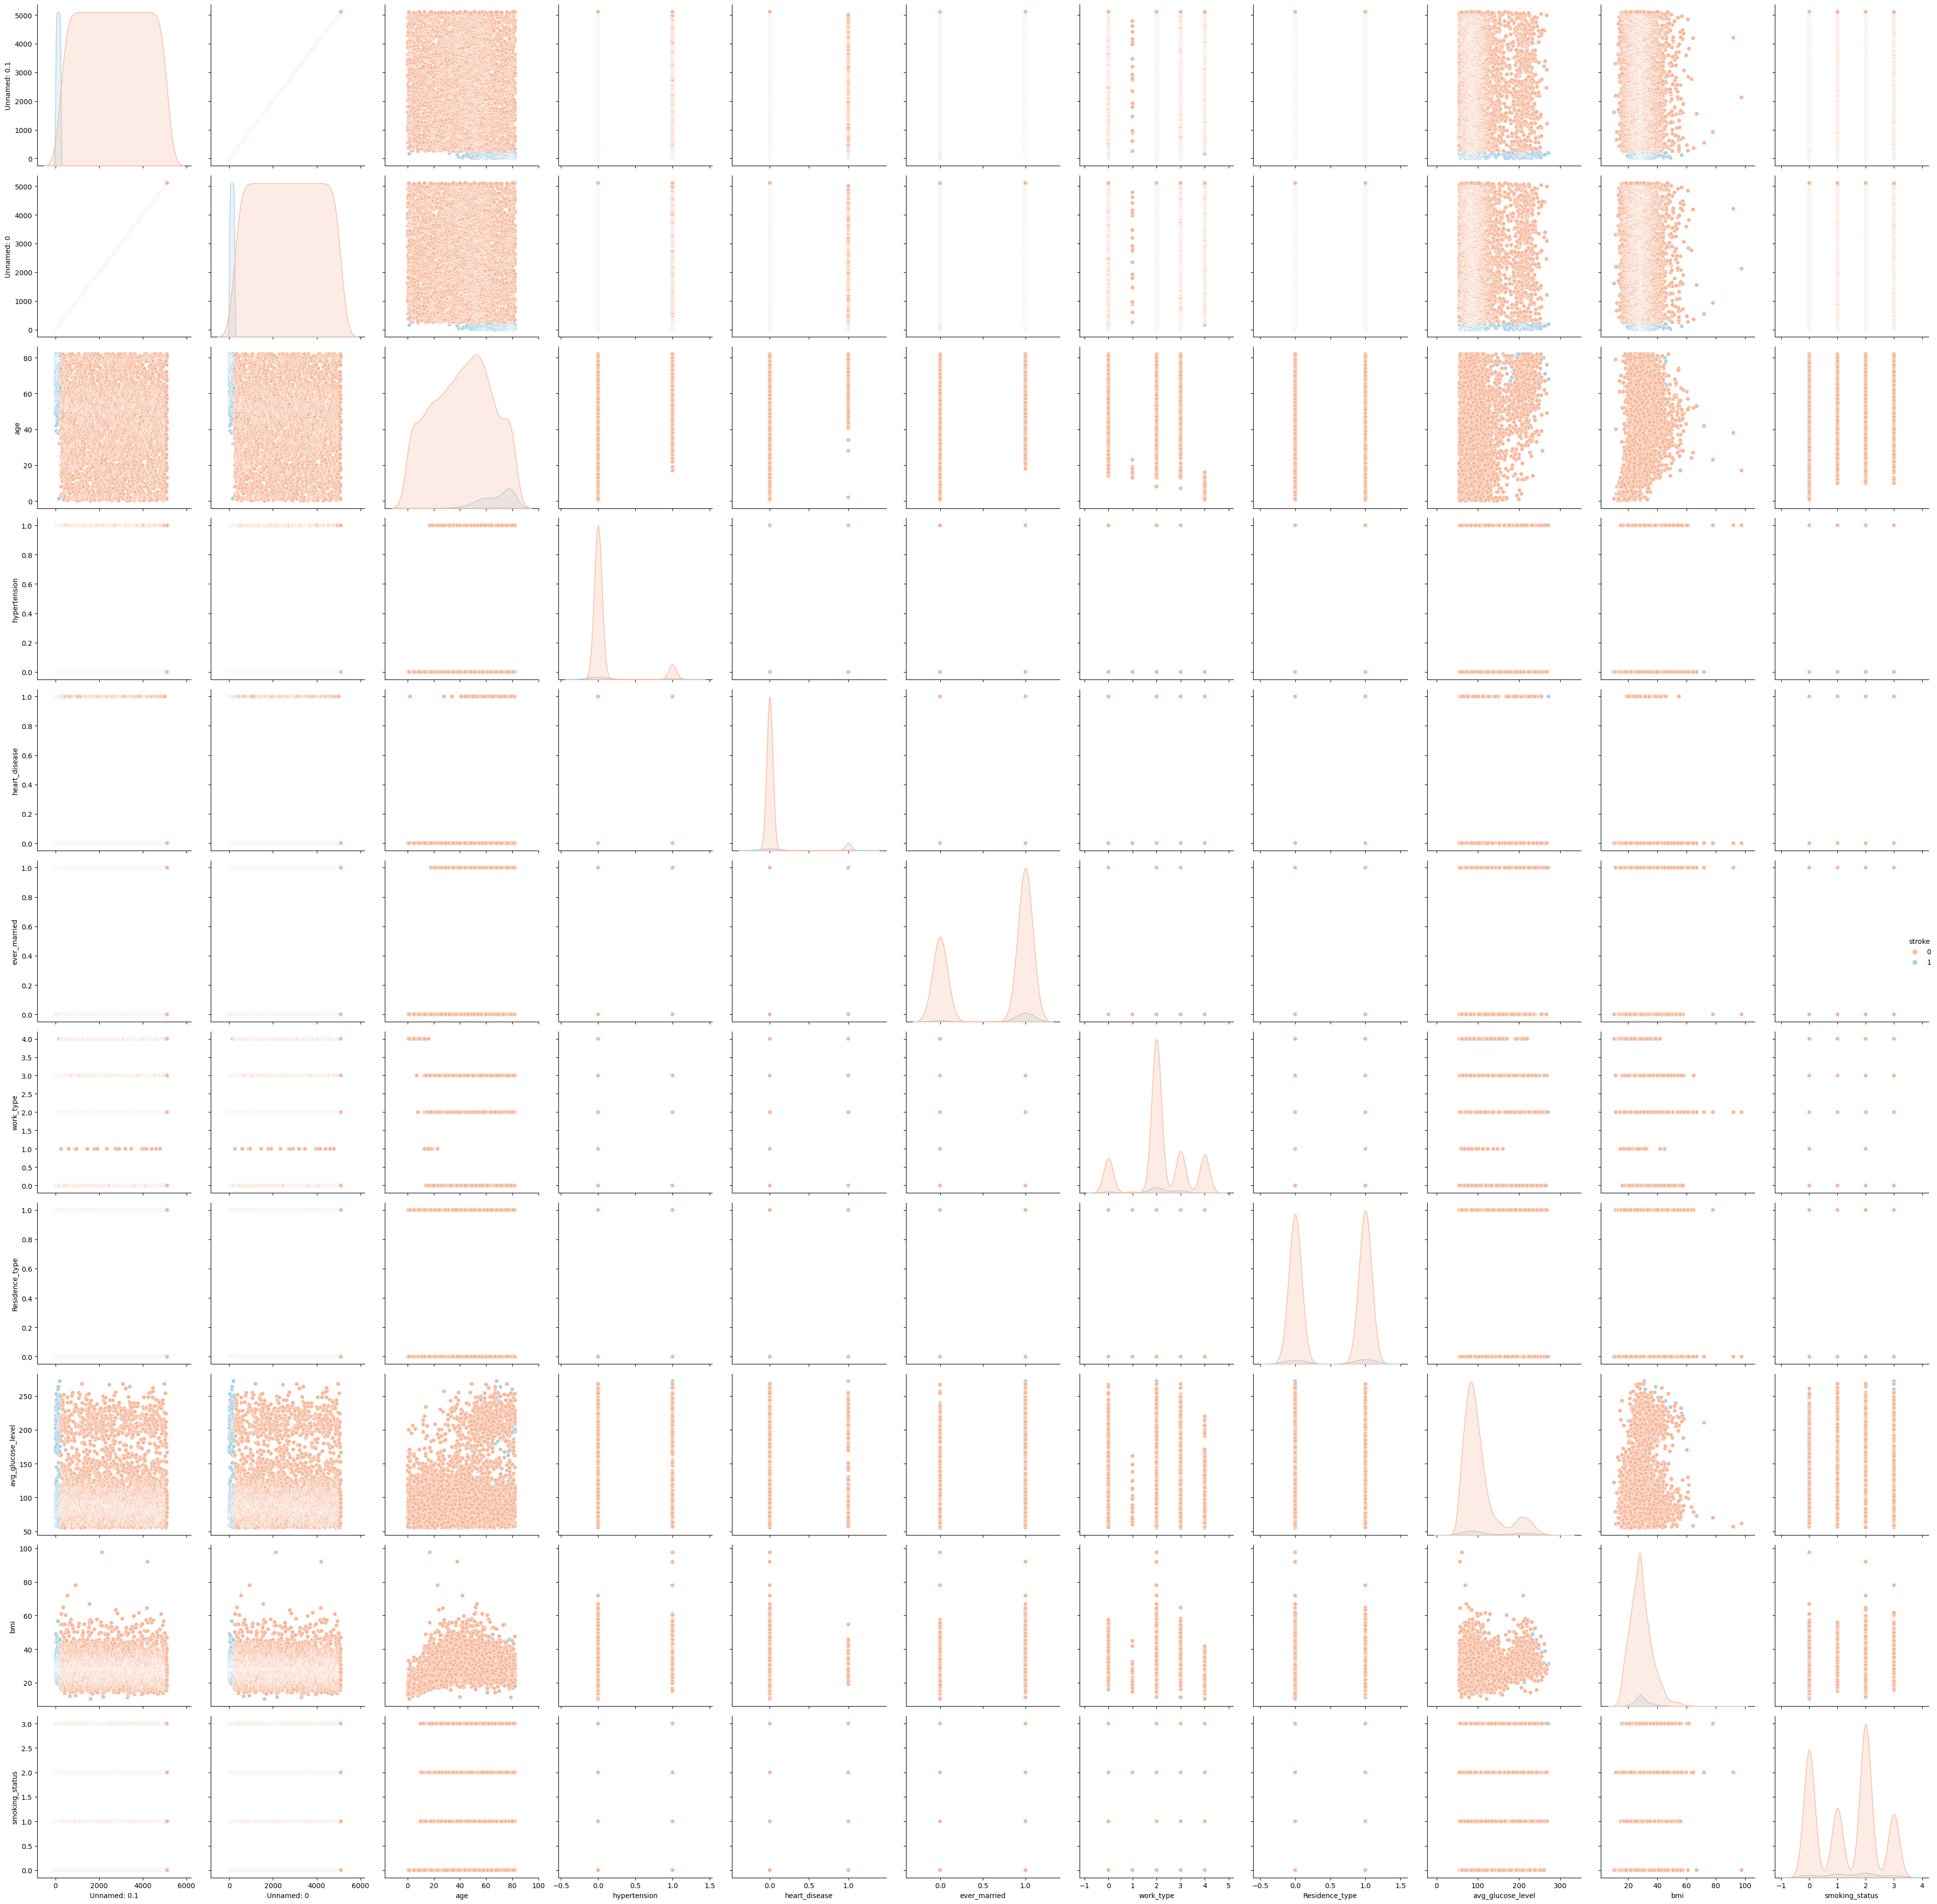

In [136]:
#make pairplot
sns.pairplot(data2,hue='stroke',palette='RdBu',height=3.5)
plt.tight_layout()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12156\3093153836.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


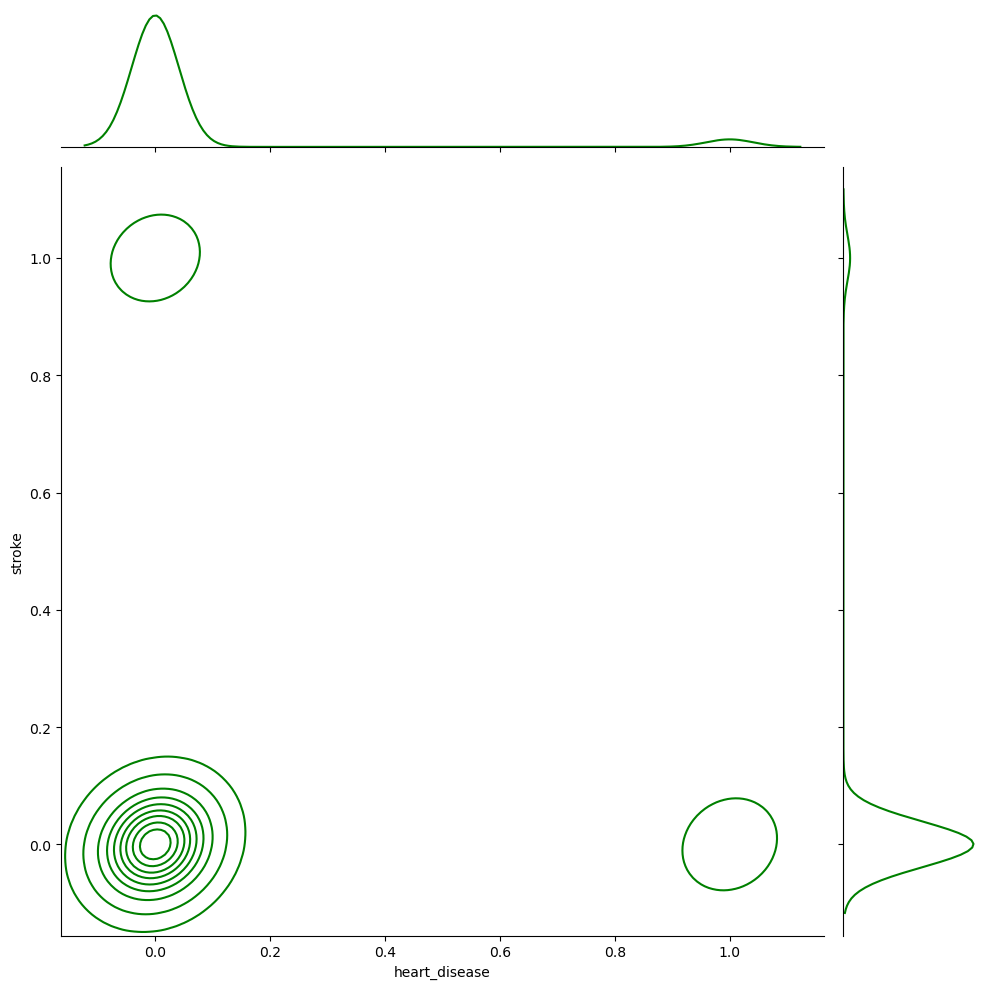

In [119]:
#joinplot
# Load or define your data
data2 = pd.read_csv('Stroke-Dataset.csv')  # Adjust the filename as needed

# Use the loaded data in jointplot
sns.jointplot(x='heart_disease', y='stroke', data=data2, height=10, kind='kde', color='green')
plt.tight_layout()
plt.show()

## Apply Model

In [120]:
from sklearn.model_selection import train_test_split

X = data2.drop('stroke',axis=1)
y = data2['stroke']

In [121]:
X

Unnamed: 0.1  Unnamed: 0   age  hypertension  heart_disease  \
0                0           0  67.0             0              1   
1                1           1  61.0             0              0   
2                2           2  80.0             0              1   
3                3           3  49.0             0              0   
4                4           4  79.0             1              0   
...            ...         ...   ...           ...            ...   
5105          5105        5105  80.0             1              0   
5106          5106        5106  81.0             0              0   
5107          5107        5107  35.0             0              0   
5108          5108        5108  51.0             0              0   
5109          5109        5109  44.0             0              0   

      ever_married  work_type  Residence_type  avg_glucose_level   bmi  \
0                1          2               1             228.69  36.6   
1                1          3               0             202.21  28.1   
2                1          2               0             105.92  32.5   
3                1          2               1             171.23  34.4   
4                1          3               0             174.12  24.0   
...            ...        ...             ...                ...   ...   
5105             1          2               1              83.75  28.1   
5106             1          3               1             125.20  40.0   
5107             1          3               0              82.99  30.6   
5108             1          2               0             166.29  25.6   
5109             1          0               1              85.28  26.2   

      smoking_status  
0                  1  
1                  2  
2                  2  
3                  3  
4                  2  
...              ...  
5105               2  
5106               2  
5107               2  
5108               1  
5109               0  

[5110 rows x 11 columns]

In [122]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [124]:
X_train

Unnamed: 0.1  Unnamed: 0    age  hypertension  heart_disease  \
802            802         802  79.00             0              0   
3927          3927        3927  62.00             0              0   
2337          2337        2337  21.00             0              0   
3910          3910        3910  31.00             0              0   
1886          1886        1886  31.00             0              0   
...            ...         ...    ...           ...            ...   
4426          4426        4426  43.00             0              0   
466            466         466  61.00             1              0   
3092          3092        3092   1.16             0              0   
3772          3772        3772  80.00             0              0   
860            860         860  46.00             0              0   

      ever_married  work_type  Residence_type  avg_glucose_level   bmi  \
802              1          3               0             112.64  28.5   
3927             1          2               1              88.32  36.3   
2337             0          2               0              59.52  33.7   
3910             1          0               1              65.70  30.4   
1886             0          2               0              59.63  19.9   
...            ...        ...             ...                ...   ...   
4426             1          0               0              88.00  30.6   
466              1          2               0             170.05  60.2   
3092             0          4               1              97.28  17.8   
3772             1          3               0             196.08  31.0   
860              1          2               0             100.15  50.3   

      smoking_status  
802                1  
3927               0  
2337               2  
3910               1  
1886               2  
...              ...  
4426               2  
466                3  
3092               0  
3772               1  
860                3  

[4088 rows x 11 columns]

In [125]:
X_train.shape

(4088, 11)

In [126]:
y_train.shape

(4088,)

In [127]:
X_test

Unnamed: 0.1  Unnamed: 0    age  hypertension  heart_disease  \
4688          4688        4688  31.00             0              0   
4478          4478        4478  40.00             0              0   
3849          3849        3849   8.00             0              0   
4355          4355        4355  79.00             1              0   
3826          3826        3826  75.00             0              0   
...            ...         ...    ...           ...            ...   
3605          3605        3605   1.88             0              0   
4934          4934        4934   1.32             0              0   
4835          4835        4835  49.00             1              0   
4105          4105        4105  56.00             0              0   
2902          2902        2902  78.00             1              1   

      ever_married  work_type  Residence_type  avg_glucose_level   bmi  \
4688             0          3               0              64.85  23.0   
4478             1          3               0              65.29  28.3   
3849             0          4               1              74.42  22.5   
4355             1          3               0              76.64  19.5   
3826             1          0               0              94.77  27.2   
...            ...        ...             ...                ...   ...   
3605             0          4               0             143.97  28.1   
4934             0          4               0             107.02  28.1   
4835             1          3               0             119.30  30.4   
4105             0          3               1             128.63  24.9   
2902             1          3               0             106.41  27.3   

      smoking_status  
4688               0  
4478               2  
3849               0  
4355               2  
3826               2  
...              ...  
3605               0  
4934               0  
4835               1  
4105               3  
2902               2  

[1022 rows x 11 columns]

In [128]:
y_train

802     0
3927    0
2337    0
3910    0
1886    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 4088, dtype: int64

## Training

In [129]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error

# Misalnya, kita punya data untuk klasifikasi
# Sesuaikan dengan jenis tugas Anda (klasifikasi atau regresi)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Buat objek model XGBoost
XGB_model = xgb.XGBClassifier()  # atau xgb.XGBRegressor() untuk regresi

# Gunakan model untuk melatih data
XGB_model.fit(X_train, y_train)

# Lakukan prediksi
predictions = XGB_model.predict(X_test)

# Evaluasi kinerja model (contoh untuk klasifikasi, sesuaikan untuk regresi)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

# Atau jika Anda melakukan regresi, hitung mean squared error
# mse = mean_squared_error(y_test, predictions)
# print(f'Mean Squared Error: {mse}')

Accuracy: 0.99706457925636


In [130]:
XGB_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [131]:
svc_prediction = XGB_model.predict(X_test)

In [132]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,svc_prediction))

[[958   2]
 [  1  61]]


In [133]:
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       0.97      0.98      0.98        62

    accuracy                           1.00      1022
   macro avg       0.98      0.99      0.99      1022
weighted avg       1.00      1.00      1.00      1022



## Save Model

In [137]:
import pickle

pickle.dump(XGB_model,open('XGB.pkl','wb'))